## Linear Regression Practical Implemetation

In [46]:
from sklearn.datasets import fetch_california_housing

In [47]:
dataset=fetch_california_housing()
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [48]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [49]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [50]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [51]:
import pandas as pd

In [52]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [53]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [54]:
df['Price']=dataset.target

In [55]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [57]:
import seaborn as sns

In [58]:
df_copy=df.sample(frac=0.25)

In [59]:
df_copy

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
2110,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75,0.554
519,5.8830,52.0,6.216080,1.012563,1104.0,2.773869,37.82,-122.25,3.407
18579,3.2813,33.0,4.671096,1.053156,1075.0,3.571429,36.93,-121.77,1.900
11492,5.3259,16.0,5.466667,1.088889,886.0,3.281481,33.69,-117.99,2.164
10096,3.8194,34.0,5.034130,1.088737,698.0,2.382253,33.93,-117.94,1.860
...,...,...,...,...,...,...,...,...,...
4089,4.6150,48.0,5.396825,1.039683,268.0,2.126984,34.15,-118.42,3.714
15182,6.5300,10.0,7.060274,0.950685,1193.0,3.268493,33.04,-117.08,2.641
17177,4.7578,22.0,5.792593,1.029630,761.0,2.818519,37.51,-122.48,3.185
8972,4.5982,44.0,5.506849,1.079452,961.0,2.632877,34.01,-118.41,3.335


In [60]:
df_copy.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,3.894335,28.952907,5.410981,1.088276,1413.955233,3.163148,35.661248,-119.598911,2.080923
std,1.868171,12.671415,1.951078,0.320618,1127.538492,10.927039,2.125898,1.988784,1.160159
min,0.499900,2.000000,1.130435,0.444444,3.000000,0.692308,32.560000,-124.270000,0.149990
25%,2.587500,18.000000,4.465934,1.005442,782.000000,2.426279,33.950000,-121.810000,1.200750
50%,3.568850,29.000000,5.242470,1.046001,1151.000000,2.810381,34.270000,-118.550000,1.804000
75%,4.789750,37.000000,6.052407,1.097382,1720.000000,3.281579,37.730000,-118.030000,2.648250
max,15.000100,52.000000,52.690476,11.181818,16305.000000,599.714286,41.860000,-114.310000,5.000010


In [18]:
df_copy.shape

(5160, 9)

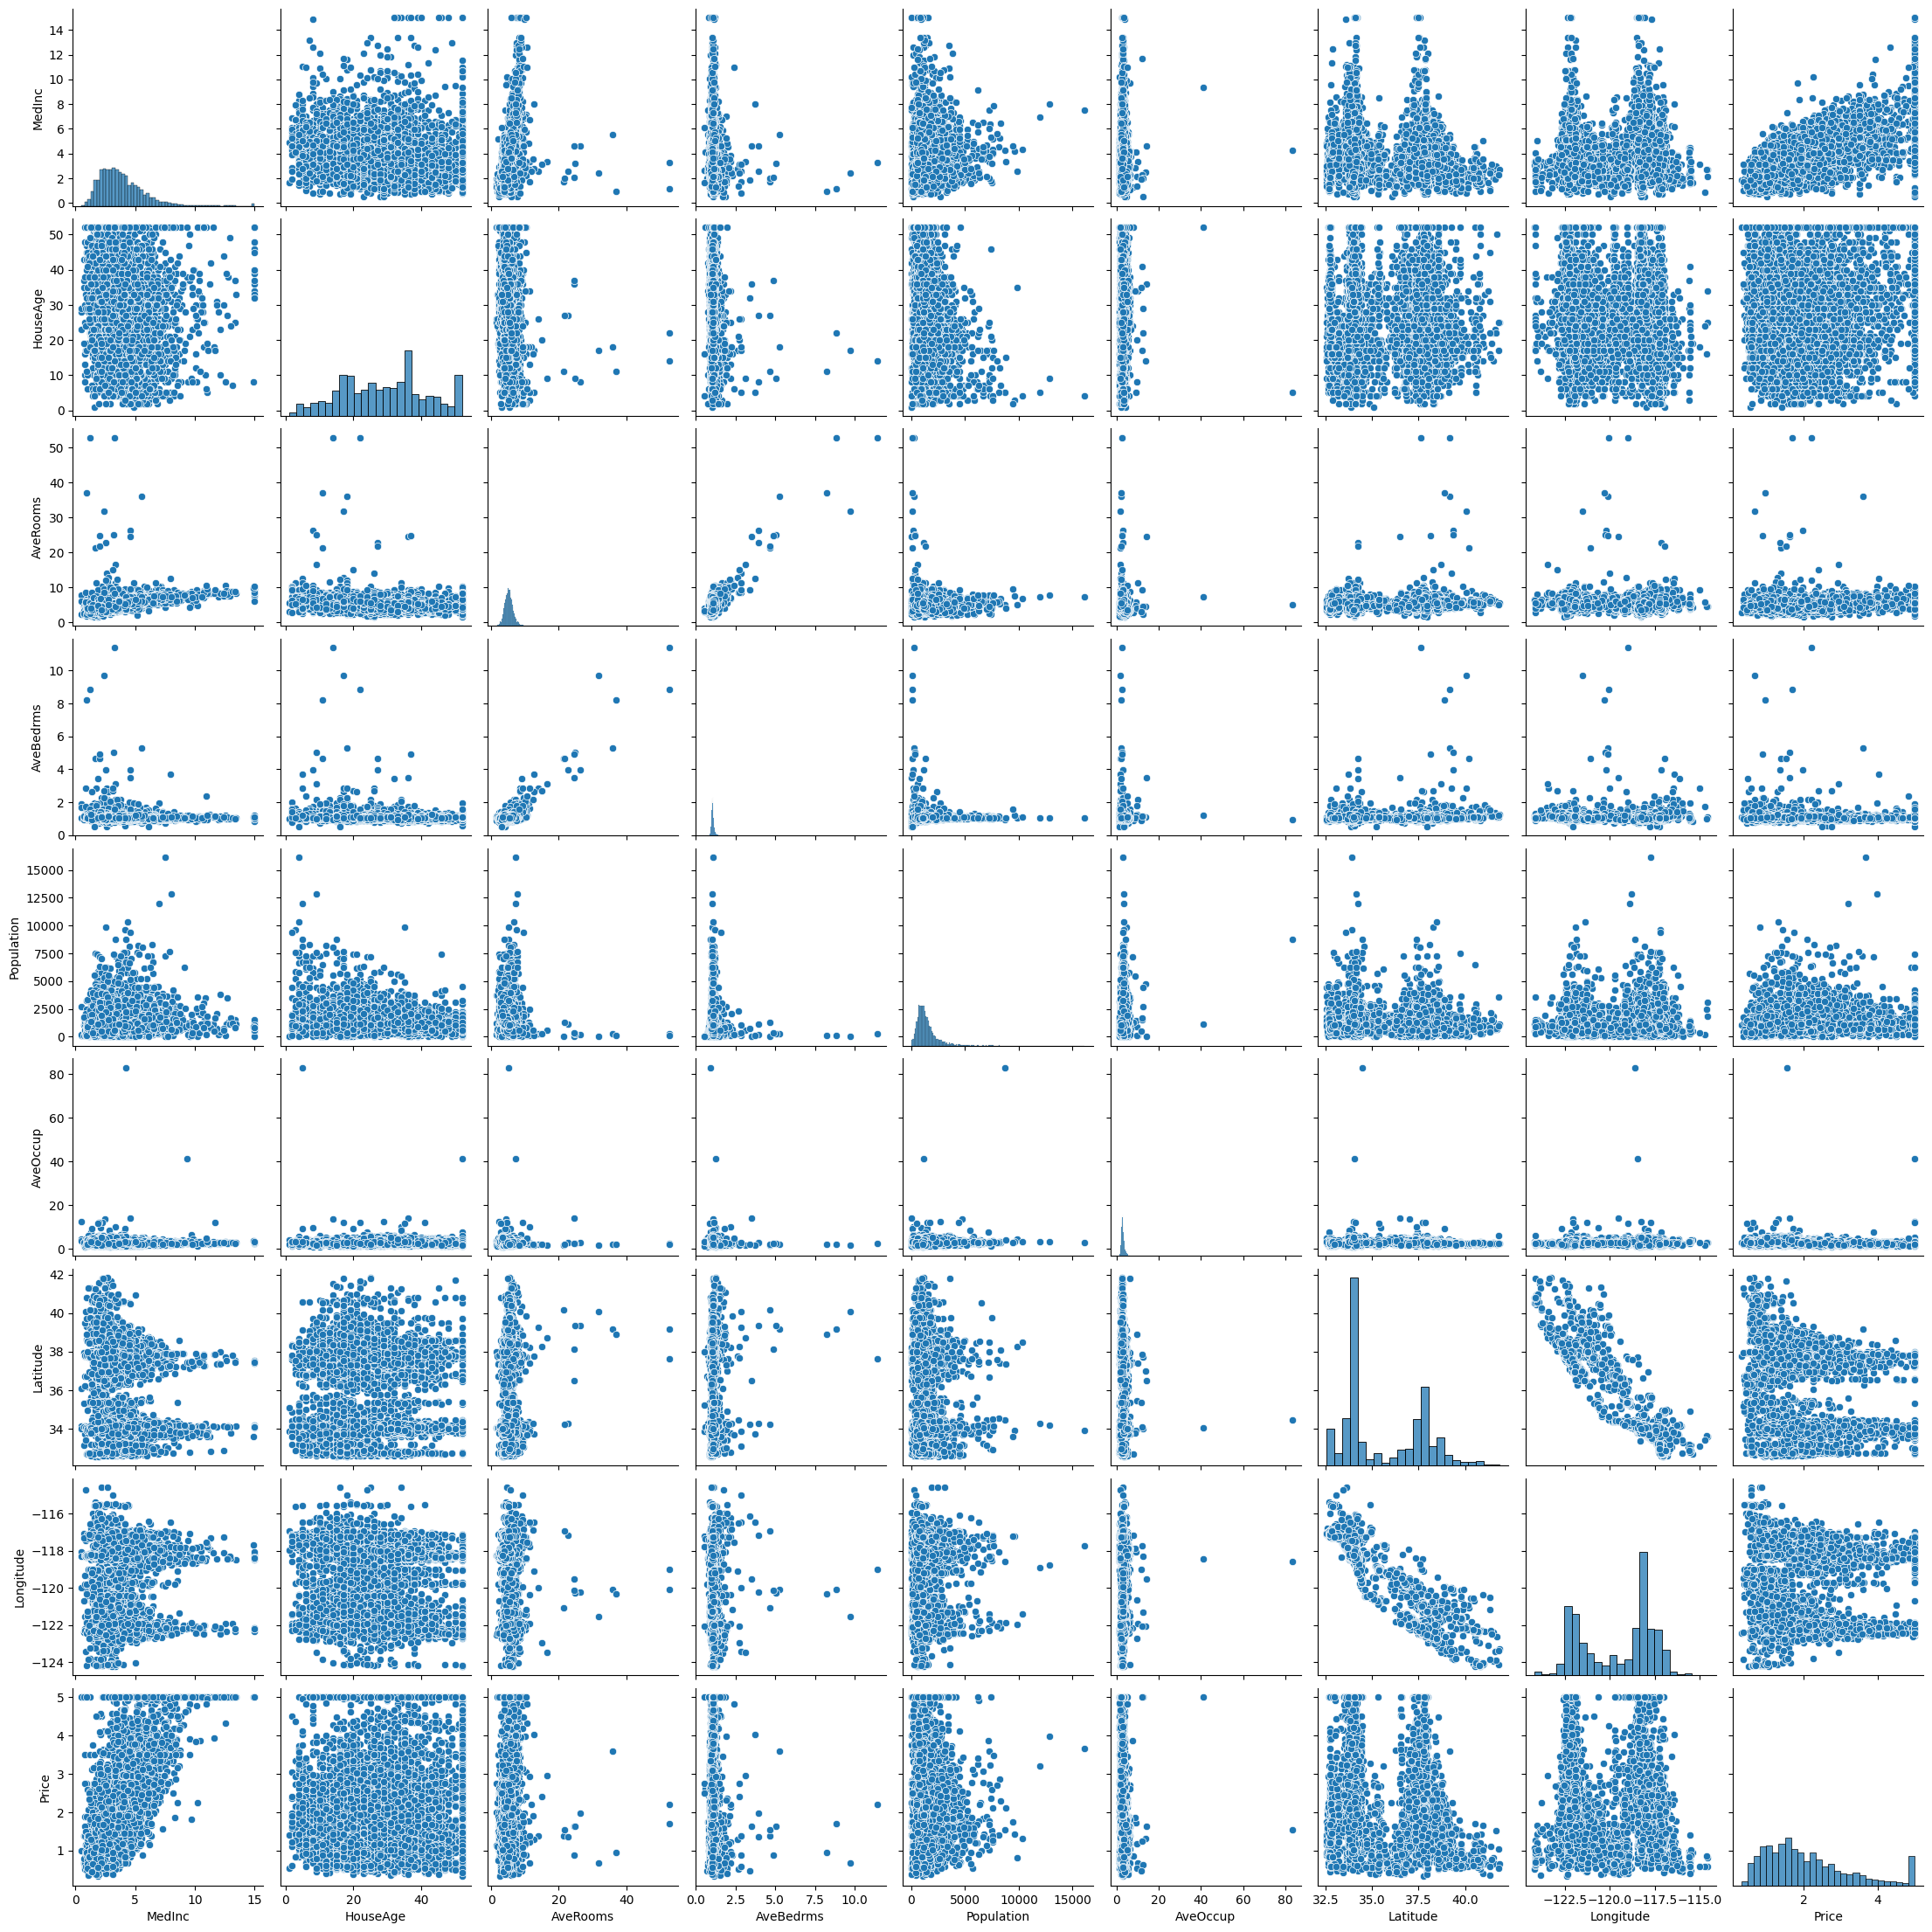

In [19]:
sns.pairplot(df_copy)

In [61]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
## Divide  the dataset into independent and dependent
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=36)

In [64]:
X.shape

(20640, 8)

In [65]:
X_train.shape,X_test.shape

((13828, 8), (6812, 8))

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
scaler.fit(X_train)

StandardScaler()

In [68]:
scaler.transform(X_train)

array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [69]:
scaler.fit_transform(X_train)

array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [70]:
X_train=scaler.fit_transform(X_train)

In [71]:
X_train

array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [72]:
scaler.transform(X_test)

array([[ 0.07003245, -1.88439705, -0.14330011, ..., -0.10560014,
        -0.74677806,  0.93812174],
       [-1.04892878,  1.0566684 , -0.26431499, ..., -0.01249385,
         1.40014871, -0.91752338],
       [ 0.15617449, -0.13565543, -0.33324929, ..., -0.17835535,
        -0.74211083,  0.55007799],
       ...,
       [ 3.81372206,  0.26178584,  0.71929056, ..., -0.0768889 ,
        -0.71877467,  0.55007799],
       [ 2.52179968,  0.26178584,  0.88449779, ..., -0.03343845,
        -0.69077128,  0.54510307],
       [-0.37291683,  0.50025061, -0.01804122, ...,  0.18848079,
        -0.74677806,  0.8037989 ]])

In [73]:
X_test=scaler.transform(X_test)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
regression=LinearRegression()

In [76]:
regression.fit(X_train,y_train)

LinearRegression()

In [77]:
regression.coef_

array([ 0.83700024,  0.12271899, -0.26347102,  0.30713139, -0.0081633 ,
       -0.02764702, -0.90609856, -0.87576409])

In [78]:
regression.intercept_

2.0708259184263804

In [79]:
regression.predict(X_test)

array([1.74054339, 0.90455512, 2.45240228, ..., 5.22766823, 4.15452378,
       1.73613111])

In [80]:
## prediction
y_pred=regression.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [82]:
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5335029155157139
0.5408989481794169
0.730412839095613


In [83]:
## Accuracy r2 and adjusted r square
from sklearn.metrics import r2_score

In [84]:
score=r2_score(y_test,y_pred)

In [85]:
score

0.5875394343499214

In [86]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.5873794961731389

In [87]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=20.0)
ridge.fit(X_train,y_train)

Ridge(alpha=20.0)

In [88]:
y_pred=ridge.predict(X_test)

In [89]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5335706984910803
0.5408065397594833
0.7304592380763489


In [90]:
from sklearn.linear_model import Lasso

In [91]:
lasso=Lasso(alpha=20.0)
lasso.fit(X_train,y_train)

Lasso(alpha=20.0)

In [92]:
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568


In [93]:
from sklearn.linear_model import ElasticNet

In [94]:
elasticnet=ElasticNet(alpha=20.0)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=20.0)

In [95]:
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568


In [96]:
df_copy.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.118297,0.418530,-0.084609,0.019108,0.005578,-0.084332,-0.014103,0.694148
HouseAge,-0.118297,1.000000,-0.198352,-0.112590,-0.299033,0.014532,0.018883,-0.119458,0.134948
AveRooms,0.418530,-0.198352,1.000000,0.755679,-0.062040,0.009676,0.119363,-0.035398,0.187643
AveBedrms,-0.084609,-0.112590,0.755679,1.000000,-0.072233,0.000540,0.084246,0.016559,-0.076126
Population,0.019108,-0.299033,-0.062040,-0.072233,1.000000,0.088602,-0.109292,0.099025,-0.019433
AveOccup,0.005578,0.014532,0.009676,0.000540,0.088602,1.000000,0.010506,0.002487,-0.022166
Latitude,-0.084332,0.018883,0.119363,0.084246,-0.109292,0.010506,1.000000,-0.922112,-0.142989
Longitude,-0.014103,-0.119458,-0.035398,0.016559,0.099025,0.002487,-0.922112,1.000000,-0.054692
Price,0.694148,0.134948,0.187643,-0.076126,-0.019433,-0.022166,-0.142989,-0.054692,1.000000
